In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# !pip install geopandas
import geopandas as gpd
from shapely.geometry import Point

In [2]:
df = pd.read_csv('apartments.csv')
df.head()

,nbath,propertyType,lotAreaValue,address,imgSrc,budget,longitude,latitude,nbed,livingArea,hasImage,car,walk,bike
0,2,CONDO,-1.0,"257 Talon Pl, Sun Prairie, WI 53590",https://photos.zillowstatic.com/fp/68472cee03d...,1700.0,-89.224850,43.179280,2,1414,True,27,276,78
1,2,CONDO,-1.0,"252 S Musket Ridge Dr APT 1, Sun Prairie, WI 5...",https://photos.zillowstatic.com/fp/7fcf99be6a1...,1980.0,-89.198040,43.180622,2,1196,True,29,301,83
2,2,CONDO,-1.0,"252 S Musket Ridge Dr APT 3, Sun Prairie, WI 5...",https://photos.zillowstatic.com/fp/b5c4656b9a0...,1960.0,-89.198040,43.180622,2,1068,True,29,301,83
3,2,CONDO,-1.0,"972 Chandler Ln, Sun Prairie, WI 53590",https://photos.zillowstatic.com/fp/7ee36c3aaba...,2100.0,-89.228294,43.197790,2,1606,True,27,299,88
4,1,CONDO,-1.0,"1300 School St APT 204, Sun Prairie, WI 53590",https://photos.zillowstatic.com/fp/fccb02ddbd5...,1850.0,-89.231320,43.199596,1,1316,True,28,299,88


In [3]:
geo = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo[:3]

In [34]:
cs = gpd.GeoDataFrame(['CS Building'], geometry=[Point((-89.40656814970647, 43.0712547367913))]) # location of CS bldng from Google Maps
cs

,0,geometry
0,CS Building,POINT (-89.40657 43.07125)


In [4]:
gdf = gpd.GeoDataFrame(df, geometry=geo)
gdf.head()

,nbath,propertyType,lotAreaValue,address,imgSrc,budget,longitude,latitude,nbed,livingArea,hasImage,car,walk,bike,geometry
0,2,CONDO,-1.0,"257 Talon Pl, Sun Prairie, WI 53590",https://photos.zillowstatic.com/fp/68472cee03d...,1700.0,-89.224850,43.179280,2,1414,True,27,276,78,POINT (-89.22485 43.17928)
1,2,CONDO,-1.0,"252 S Musket Ridge Dr APT 1, Sun Prairie, WI 5...",https://photos.zillowstatic.com/fp/7fcf99be6a1...,1980.0,-89.198040,43.180622,2,1196,True,29,301,83,POINT (-89.19804 43.18062)
2,2,CONDO,-1.0,"252 S Musket Ridge Dr APT 3, Sun Prairie, WI 5...",https://photos.zillowstatic.com/fp/b5c4656b9a0...,1960.0,-89.198040,43.180622,2,1068,True,29,301,83,POINT (-89.19804 43.18062)
3,2,CONDO,-1.0,"972 Chandler Ln, Sun Prairie, WI 53590",https://photos.zillowstatic.com/fp/7ee36c3aaba...,2100.0,-89.228294,43.197790,2,1606,True,27,299,88,POINT (-89.22829 43.19779)
4,1,CONDO,-1.0,"1300 School St APT 204, Sun Prairie, WI 53590",https://photos.zillowstatic.com/fp/fccb02ddbd5...,1850.0,-89.231320,43.199596,1,1316,True,28,299,88,POINT (-89.23132 43.19960)


https://catalog.data.gov/dataset/tiger-line-shapefile-2019-state-wisconsin-current-county-subdivision-state-based

In [7]:
map = gpd.read_file('./tl_2019_55_cousub/tl_2019_55_cousub.shp')

In [8]:
maplat = map.INTPTLAT.apply(lambda x: x[1:]).astype(float)
maplon = map.INTPTLON.astype(float)

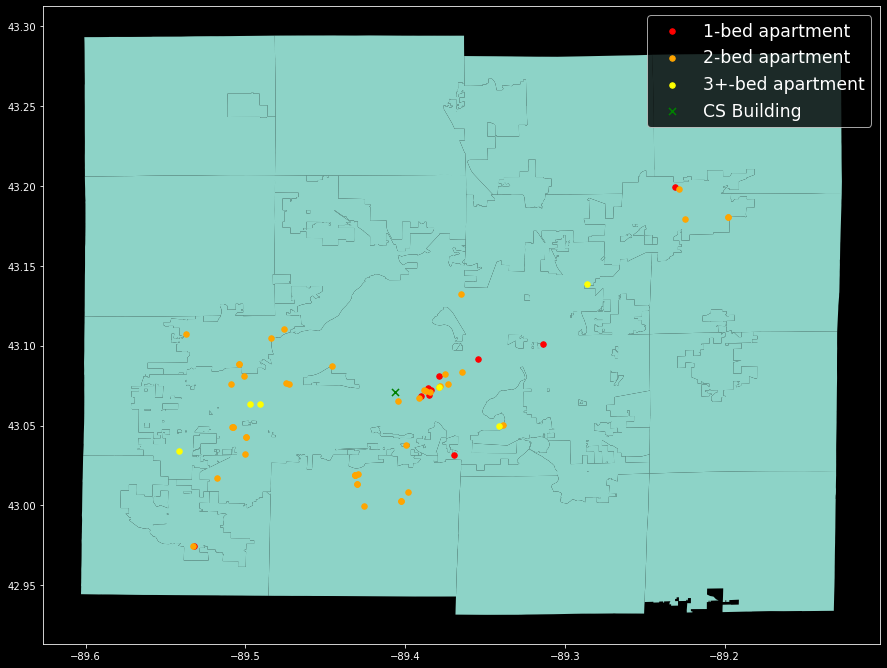

In [40]:
fig, ax = plt.subplots(figsize=(15,15))
map[(maplat < 43.25) & (maplat >42.95) & (maplon > -89.6) & (maplon < -89.1)].plot(ax=ax)
gdf[gdf.nbed==1].plot(ax=ax, markersize=30, color='red', label='1-bed apartment')
gdf[gdf.nbed==2].plot(ax=ax, markersize=30, color='orange', label='2-bed apartment')
gdf[gdf.nbed==3].plot(ax=ax, markersize=30, color='yellow', label='3+-bed apartment')
cs.plot(ax=ax, markersize=50, color='green', marker='x', label='CS Building')
plt.legend(fontsize='xx-large')